In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [41]:
ms_path = "/dhc/home/wei-cheng.lai/experiments/multisources/retinal/fids/ms_stratified_fid.csv"
source1_path = "/dhc/home/wei-cheng.lai/experiments/singlesource/retinal/fids/source1/ms_stratified_fid.csv"
source2_path = "/dhc/home/wei-cheng.lai/experiments/singlesource/retinal/fids/source2/ms_stratified_fid.csv"

In [112]:
ms_df = pd.read_csv(ms_path)
source1_df = pd.read_csv(source1_path)
source2_df = pd.read_csv(source2_path)

In [113]:
ms_df

,c1_min,c1_max,c2_min,c2_max,c3_min,c3_max,fid_score
0,40.0,50.0,65.000000,122.833336,0.006667,3.574444,13.921998
1,40.0,50.0,65.000000,122.833336,3.574444,7.142222,62.518330
2,40.0,50.0,122.833336,180.666670,0.006667,3.574444,13.090489
3,40.0,50.0,122.833336,180.666670,3.574444,7.142222,49.268530
4,50.0,60.0,65.000000,122.833336,0.006667,3.574444,15.148872
5,50.0,60.0,65.000000,122.833336,3.574444,7.142222,70.164320
6,50.0,60.0,122.833336,180.666670,0.006667,3.574444,13.063703
7,50.0,60.0,122.833336,180.666670,3.574444,7.142222,45.657806


In [123]:
vmin = min(ms_df["fid_score"].min(), source1_df["fid_score"].min(), source2_df["fid_score"].min())
vmax = max(ms_df["fid_score"].max(), source1_df["fid_score"].max(), source2_df["fid_score"].max())

In [124]:
## take out the ages (grouped by age)
ms_age_dfs = []
for c1 in ms_df["c1_min"].unique():
    print(f"age: {c1}")
    cur_df = ms_df.loc[ms_df["c1_min"] == c1].drop(columns=["c1_min", "c1_max","c2_max", "c3_max"])
    ms_age_dfs.append(cur_df)
    # plt.figure(figsize=(10,5))
    # sns.heatmap(data=cur_df["num_samples"])
    # plt.ylim(0, 100)
    # plt.show()
source1_age_df = []
for c1 in source1_df["c1_min"].unique():
    print(f"age: {c1}")
    cur_df = source1_df.loc[source1_df["c1_min"] == c1].drop(columns=["c1_min", "c1_max","c2_max", "c3_max"])
    source1_age_df.append(cur_df)

source2_age_df = []
for c1 in source2_df["c1_min"].unique():
    print(f"age: {c1}")
    cur_df = source2_df.loc[source2_df["c1_min"] == c1].drop(columns=["c1_min", "c1_max","c2_max", "c3_max"])
    source2_age_df.append(cur_df)


age: 40.0
age: 50.0
age: 40.0
age: 50.0
age: 40.0
age: 50.0


In [160]:
cur = ms_age_dfs[0]

In [161]:
cur

,c2_min,c3_min,fid_score
0,65.000000,0.006667,13.921998
1,65.000000,3.574444,62.518330
2,122.833336,0.006667,13.090489
3,122.833336,3.574444,49.268530


In [162]:
cur.index = np.arange(len(cur))

In [163]:
score = np.zeros((int(len(cur)/2), int(len(cur)/2)))
num = 0
for i in range(int(cur.shape[0] / 2)):
    for j in range(int(cur.shape[0] / 2)):
        score[i, j] = cur["fid_score"][num]
        num += 1

In [164]:
score
score = pd.DataFrame(score, columns=cur["c2_min"].unique(), index=cur["c3_min"].unique())

In [165]:
score

,65.000000,122.833336
0.006667,13.921998,62.51833
3.574444,13.090489,49.26853


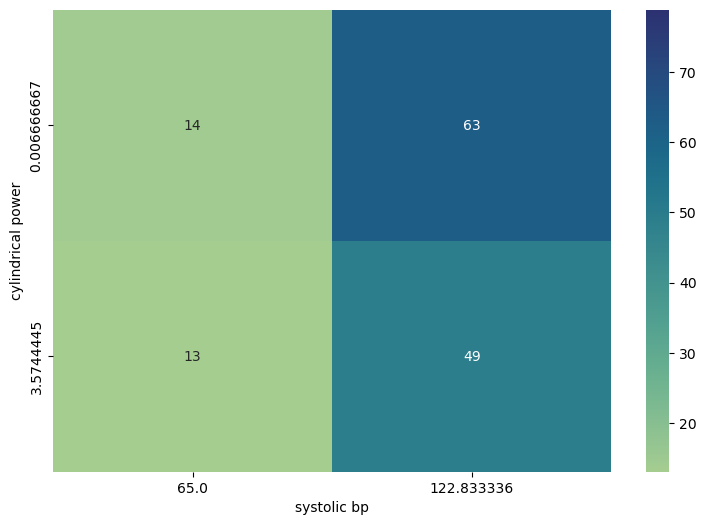

In [166]:
# for df in ms_age_dfs:
save_path = "/dhc/home/wei-cheng.lai/experiments/multisources/retinal/plots/heatmap0.png"
plt.figure(figsize=(9,6))
ax = sns.heatmap(data=score, annot=True, cmap="crest", vmin=vmin, vmax=vmax)
ax.set(xlabel="systolic bp", ylabel="cylindrical power")
plt.savefig(save_path)
plt.show()